In [1]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import seaborn as sns                                  # Make the plots nicer to look at
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy.signal import find_peaks
import glob
import os

In [2]:
sys.path.append('External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

# In case you want to load function from a jupyter notebook from the current working directory, you can use the function below:
#   from ipynb.fs.full.ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [3]:
def line(x,a,b):
    """Just a line"""
    return a*x+b

def gauss_pdf(x, mu, sigma) :
    """Gaussian"""
    return 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def exp_pdf(x, a, V0, s0):
    """Exponential"""
    return 0.5 * a * x**2 + V0 * x + s0

In [4]:
def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

In [5]:
def cal_avg_error(df):
    df = df.append(pd.Series(1, index=df.columns), ignore_index=True) #adds row
    for i in range(int(len(df.T)/2)):
        df.iloc[-1, i*2], df.iloc[-1, i*2+1] = w_mean(df.iloc[:-1, i*2], df.iloc[:-1, i*2+1]) # Weighted Error and Average
    return df

def w_mean(dat,err):
    weight = 0
    for i in err:
        if i == 0:
            weight = 1
        else:
            weight += (1/i)**2

    mean_weighted = 0
    for i in range(len(dat)):
        mean_weighted += (dat[i]*(1/err[i])**2)/weight

    err_weighted = np.sqrt(1/weight)
    return mean_weighted, err_weighted

In [6]:
def peak_finder(df, offset=0, line=1, peakN=0, plot=True, zoom=False):
    
    peaks, _ = find_peaks(df.iloc[:,1], height=line)
    df.iloc[:,0] -= df.iloc[:,0][peaks[0]] - offset
    
    if plot == True:
        plt.plot(df.iloc[:,0], df.iloc[:,1])
        plt.plot(df.iloc[:,0][peaks], df.iloc[:,1][peaks], "x")
        plt.plot(df.iloc[:,0], np.ones_like(df.iloc[:,1])*line, "--", color="gray")

        plt.xlim([-0.10, df.iloc[:,0][peaks[-1]] + 0.10])
    
    if zoom == True:
        plt.xlim([df.iloc[:,0][peaks[peakN]]-0.01, df.iloc[:,0][peaks[peakN]] + 0.01])
        plt.ylim([df.iloc[:,1][peaks[peakN]]-0.0001, df.iloc[:,1][peaks[peakN]] + 0.0001])
    
    if plot == True:
        plt.show()
        
    return df.iloc[:,0][peaks]

In [7]:
Rol_main = pd.read_csv (r'CSV/Rolling_ball_main.csv', sep=";")
Rol_left = pd.read_csv (r'CSV/Rolling_ball_left.csv', sep=";")
Rol_right = pd.read_csv (r'CSV/Rolling_ball_right.csv', sep=";")

In [8]:
Rol_main

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
0,5.8,0.04,12.81,0.05,11.10,0.05,797.0,0.7,631.5,0.7,...,290.5,0.7,113.0,0.7,888.88,0.2,241.2,0.2,26.40,0.03
1,6.0,0.02,12.76,0.04,11.02,0.04,797.0,0.5,632.0,0.5,...,291.5,0.5,113.0,0.5,889.00,0.3,241.1,0.3,26.68,0.02
2,5.8,0.01,12.71,0.01,11.01,0.01,797.2,0.3,631.8,0.3,...,290.4,0.3,113.8,0.3,888.90,0.2,241.1,0.2,26.52,0.02
3,6.0,0.05,12.79,0.05,11.03,0.05,797.2,0.4,631.8,0.4,...,290.5,0.4,113.0,0.4,889.10,0.3,240.5,0.4,26.48,0.05


In [9]:
path = r'Data/Rolling_ball/csv/' # use your path
names_list = np.sort(os.listdir(path))

for i in range(len(names_list)):
    names_list[i] = names_list[i].replace('.csv', '')

for i in names_list: 
    locals()[i] = pd.read_csv((path + i + '.csv'), index_col=None, sep=',', skiprows=14)

print(names_list)

['Slope_1_1_stor_venstre' 'Slope_1_2_stor_venstre'
 'Slope_1_3_stor_venstre' 'Slope_1_4_stor_venstre'
 'Slope_2_1_lille_venstre' 'Slope_2_2_lille_venstre'
 'Slope_2_3_lille_venstre' 'Slope_2_4_lille_venstre'
 'Slope_3_1_stor_højdre' 'Slope_3_2_stor_højdre' 'Slope_3_3_stor_højdre'
 'Slope_3_4_stor_højdre' 'Slope_4_1_lille_højdre' 'Slope_4_2_lille_højdre'
 'Slope_4_3_lille_højdre' 'Slope_4_4_lille_højdre'
 'Slope_5_1_lille_freefall' 'Slope_5_2_lille_freefall']


In [10]:
for i in names_list:
    locals()[i+'_peak_time'] = peak_finder(locals()[i], offset = 0, plot=False)
    print([i+'_peak_time'])

['Slope_1_1_stor_venstre_peak_time']
['Slope_1_2_stor_venstre_peak_time']
['Slope_1_3_stor_venstre_peak_time']
['Slope_1_4_stor_venstre_peak_time']
['Slope_2_1_lille_venstre_peak_time']
['Slope_2_2_lille_venstre_peak_time']
['Slope_2_3_lille_venstre_peak_time']
['Slope_2_4_lille_venstre_peak_time']
['Slope_3_1_stor_højdre_peak_time']
['Slope_3_2_stor_højdre_peak_time']
['Slope_3_3_stor_højdre_peak_time']
['Slope_3_4_stor_højdre_peak_time']
['Slope_4_1_lille_højdre_peak_time']
['Slope_4_2_lille_højdre_peak_time']
['Slope_4_3_lille_højdre_peak_time']
['Slope_4_4_lille_højdre_peak_time']
['Slope_5_1_lille_freefall_peak_time']
['Slope_5_2_lille_freefall_peak_time']


In [11]:
Slope_1_1_stor_venstre_peak_time

13025    0.00000
24699    0.23348
33516    0.40982
40240    0.54430
46528    0.67006
Name: Time (s), dtype: float64

In [12]:
cal_avg_error(Rol_left)[-1:]

,Vinkel_left_front_grader,Vinkel_left_front_grader_error,Vinkel_left_bagside_grader,Vinkel_left_bagside_grader_error
4,76.8,0.123929,76.253247,0.136753


In [13]:
cal_avg_error(Rol_right)[-1:]

,Vinkel_right_front_grader,Vinkel_right_front_grader_error,Vinkel_right_bagside_grader,Vinkel_right_bagside_grader_error
4,75.9,0.078784,75.775472,0.082416


In [14]:
cal_avg_error(Rol_main)[-1:]

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
4,5.842884,0.008599,12.719037,0.009356,11.014398,0.009356,797.148373,0.206716,631.808023,0.206716,...,290.623447,0.206716,113.379836,0.206716,888.939231,0.11767,241.081443,0.121842,26.558498,0.012393


In [15]:
offset = 0

Sensor_list = []
Rol_main_updated = cal_avg_error(Rol_main)
copy = Rol_main_updated.iloc[-1:,6].copy()
for i in range(5):
    x = abs(Rol_main_updated.iloc[-1:,6+2*i]- copy)

    Rol_main_updated.iloc[-1:,6+2*i] = x + offset
    Sensor_list.append(float(x))
    
Rol_main_updated

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
0,5.800000,0.040000,12.810000,0.050000,11.100000,0.050000,797.0,0.700000,631.50000,0.700000,...,290.500000,0.700000,113.000000,0.700000,888.880000,0.20000,241.200000,0.200000,26.400000,0.030000
1,6.000000,0.020000,12.760000,0.040000,11.020000,0.040000,797.0,0.500000,632.00000,0.500000,...,291.500000,0.500000,113.000000,0.500000,889.000000,0.30000,241.100000,0.300000,26.680000,0.020000
2,5.800000,0.010000,12.710000,0.010000,11.010000,0.010000,797.2,0.300000,631.80000,0.300000,...,290.400000,0.300000,113.800000,0.300000,888.900000,0.20000,241.100000,0.200000,26.520000,0.020000
3,6.000000,0.050000,12.790000,0.050000,11.030000,0.050000,797.2,0.400000,631.80000,0.400000,...,290.500000,0.400000,113.000000,0.400000,889.100000,0.30000,240.500000,0.400000,26.480000,0.050000
4,5.842884,0.008599,12.719037,0.009356,11.014398,0.009356,0.0,0.206716,165.34035,0.206716,...,506.524927,0.206716,683.768538,0.206716,888.939231,0.11767,241.081443,0.121842,26.558498,0.012393


In [16]:
Sensor_list

[0.0,
 165.34035028221206,
 342.37833385819135,
 506.5249267217363,
 683.7685375838763]

[1426.2733606097504, 542.6982424812854, -0.0489815692190092]


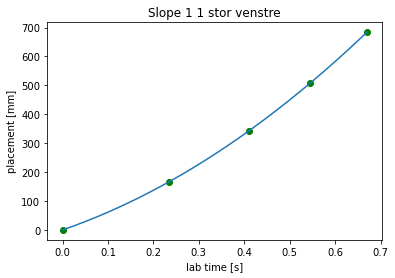

[1430.147581060983, 541.2411161928521, -0.03970792005741863]


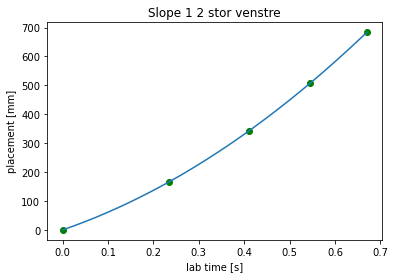

[1429.2636193785727, 541.9786913058434, -0.034545923787055344]


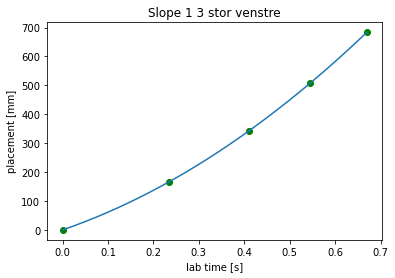

[1427.957078341963, 538.7812218849814, -0.02780461502338838]


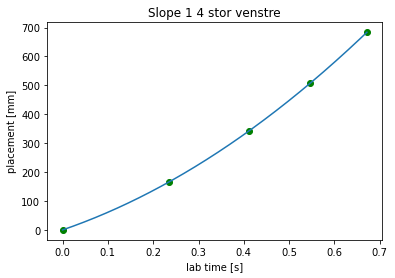

[1378.402675334984, 525.5278058472295, -0.04211554372492188]


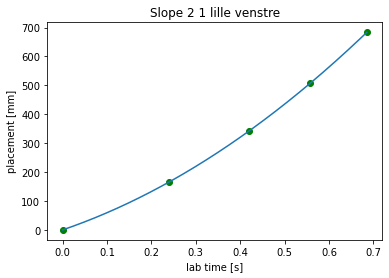

[1364.3138186806284, 522.091194552503, 0.039886103010124074]


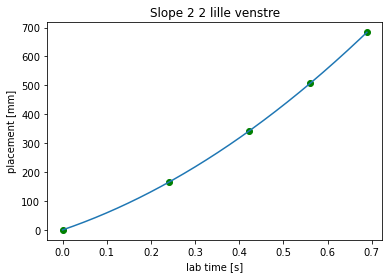

[1371.7934236623753, 535.3639683051674, -0.13369300479712187]


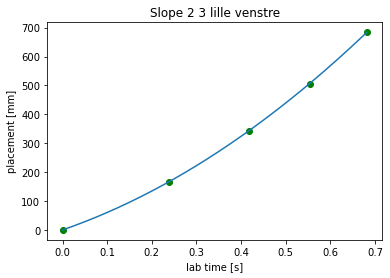

[1382.0554755599308, 532.4308945319401, -0.06114084417558274]


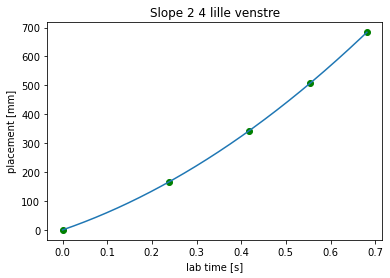

[1506.1351573763604, 554.8567059004314, -0.021139643310549516]


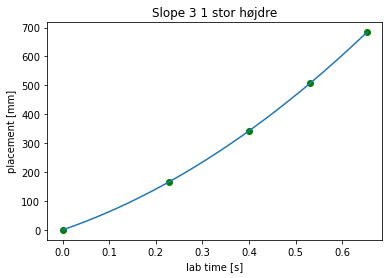

[1506.072379837502, 554.4806351195967, 0.0020505851805534547]


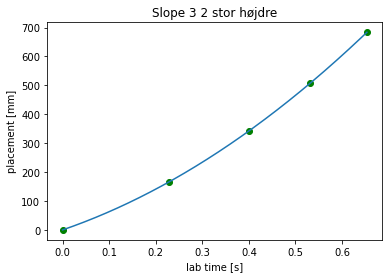

[1509.7425194246741, 554.4778326703087, -0.0031315103060673977]


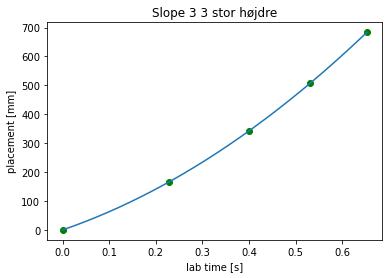

[1513.569889403408, 551.997189039448, -0.022061593119543588]


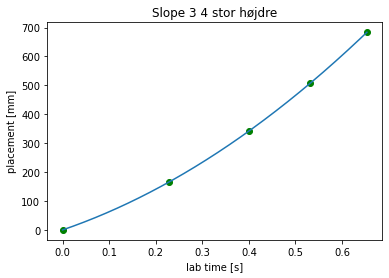

[1461.1472016719692, 542.2095785139765, -0.044249998572650995]


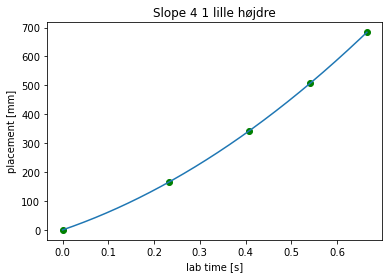

[1462.9277619092213, 545.7780382896699, -0.02781855265823019]


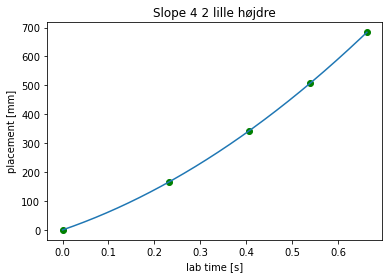

[1460.3053076695903, 547.6893960258205, -0.058595097896668946]


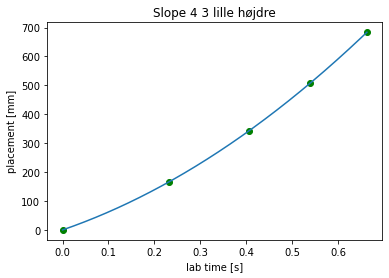

[1462.8497641116826, 541.6107798272311, -0.06298601600338571]


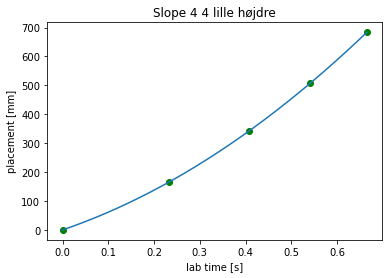

[9673.16347503992, 1136.2606442253098, -0.03561567827790757]


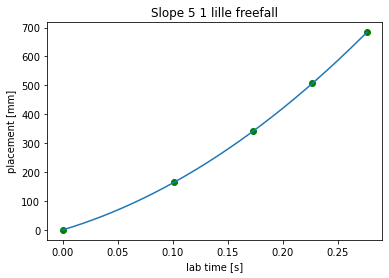

[9644.17471407787, 1008.8858874786434, -0.03407797251286204]


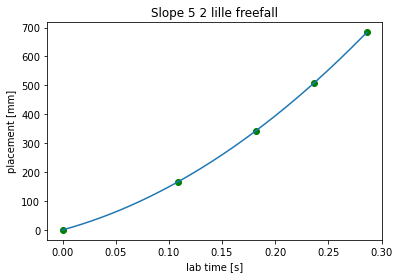

In [17]:
Minuit.print_level = 1

for i in names_list:
    Minuit.print_level += 1
    
    x, y = locals()[i+'_peak_time'], Sensor_list
    x_axis = np.linspace(min(x), max(x), 1000)
    
    
    #ullhfit = UnbinnedLH(exp_pdf, x, bound=(min(x), max(x)), extended=True)
    #minuit_ullh = Minuit(ullhfit, a=5000, V0=100)
    #minuit_ullh.errordef = 0.5     # Value for likelihood fits
    #minuit_ullh.migrad()           # Perform the actual fit
    
    chi2fit = Chi2Regression(exp_pdf, x, y)
    
    minuit_chi2 = Minuit(chi2fit, a=5, V0=1, s0=0)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()
    

    
    print(minuit_chi2.values[:])
    
    fig = plt.figure()
    
    ax = fig.add_subplot()
    ax.set_xlabel('lab time [s]')
    ax.set_ylabel('placement [mm]')
    ax.set_title(f'{i}'.replace('_',' '))
    
    plt.scatter(x, y, color='g')
    ax.plot(x_axis, exp_pdf(x_axis, *minuit_chi2.values[:]), '-', label='') 
    
    plt.show()

In [18]:
sintheat = H/np.sqrt(L**2 + H**2)

NameError: name 'H' is not defined